# LGMVIP-DataScience

## AUTHOR - PRABIN KUMAR MOHANTA

## Intermediate Level Task

### Task - Prediction using Decision Tree Algorithm :
Creating the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#improting dataset
data = pd.read_csv('Iris.csv')

In [6]:
data.shape

(150, 5)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns={'Id'},axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [14]:
label_names=data.Species.unique()
print(label_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
data.duplicated().sum()

3

In [11]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica
146,5.9,3.0,5.1,1.8,Iris-virginica


## Visualizing data

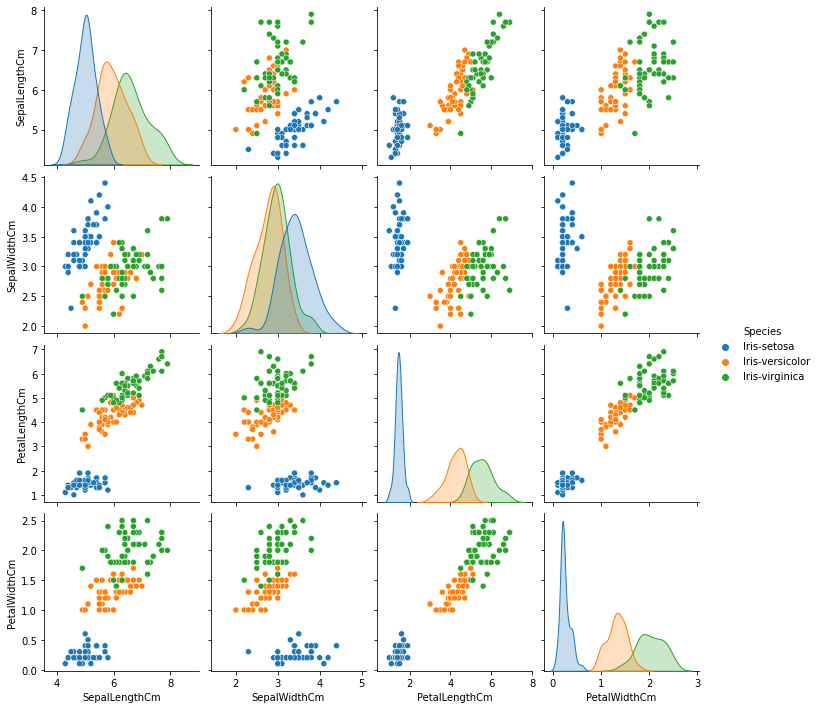

In [36]:
sns.pairplot(data,hue='Species')

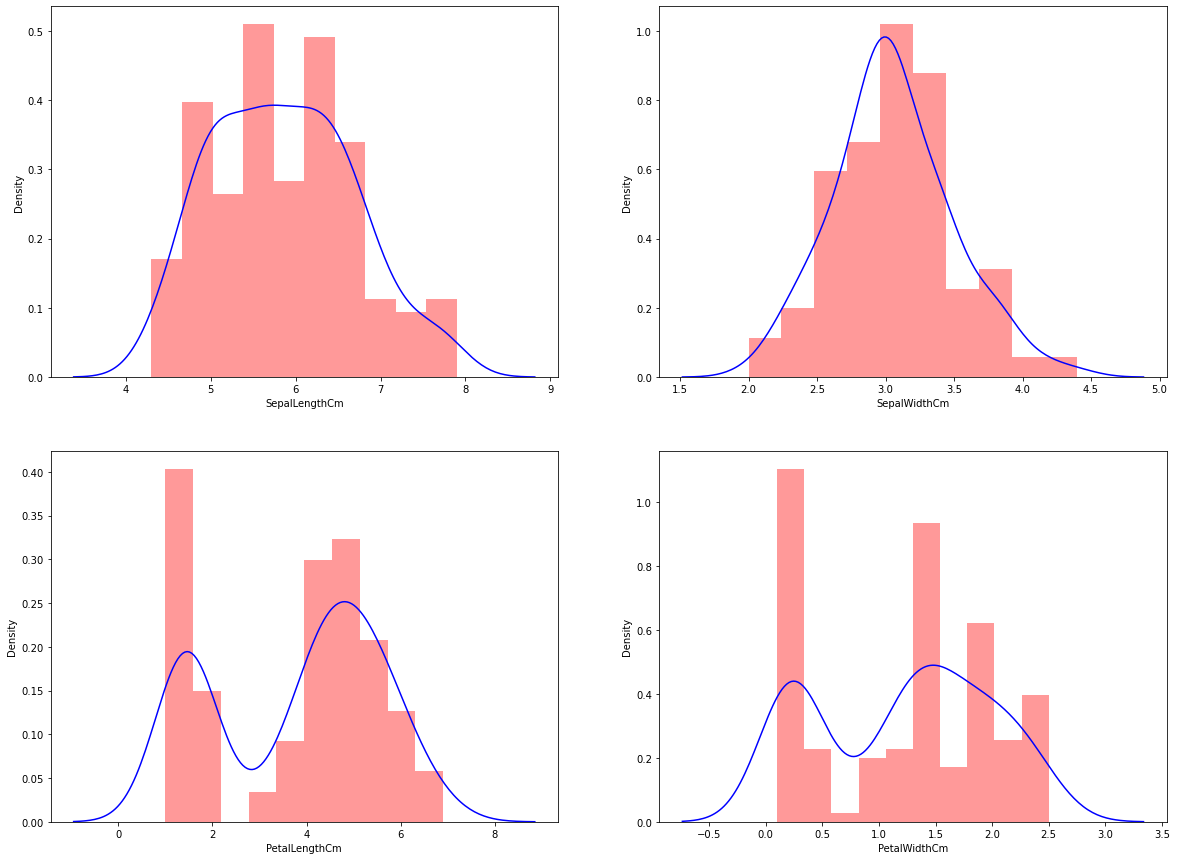

In [19]:
plt.figure(figsize=(20,15))
a=1
for i, column in enumerate(data.columns):
    if data[column].dtype != 'object':
        plt.subplot(2,2,a)
        sns.distplot(data[column],kde=True,color='b',bins=10,hist_kws={'color':'r'})
        plt.xlabel(column)
        a+=1

plt.show()

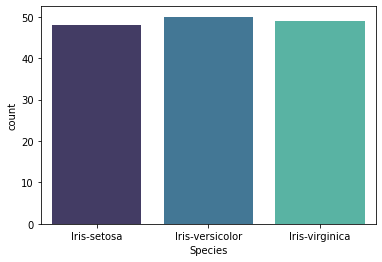

In [21]:
sns.countplot(data['Species'],palette="mako")
plt.xlabel(column)
plt.show()

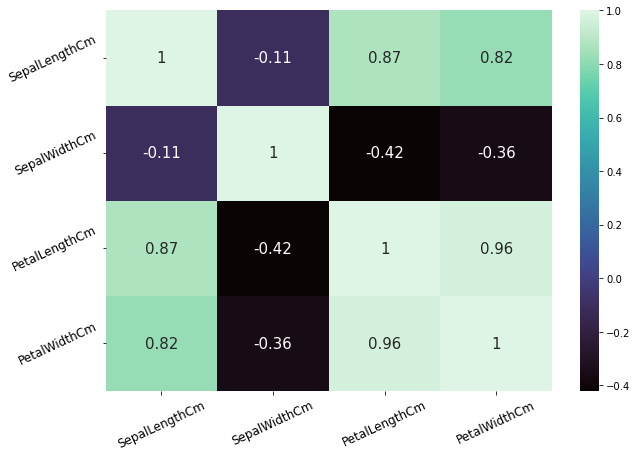

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='mako',annot_kws={'size':15})
plt.xticks(rotation=25,fontsize=12)
plt.yticks(rotation=25,fontsize=12)
plt.show()

# Implementing the Decision Tree

## Preparing the data

In [27]:
X=data.drop('Species',axis=1)
Y=data['Species']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

## Importing decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Visualizing the Decision Tree

[Text(446.4, 978.48, 'PetalWidthCm <= 0.8\nentropy = 1.579\nsamples = 98\nvalue = [30, 37, 31]\nclass = Iris-versicolor'),
 Text(334.79999999999995, 761.0400000000001, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = Iris-setosa'),
 Text(558.0, 761.0400000000001, 'PetalLengthCm <= 4.95\nentropy = 0.994\nsamples = 68\nvalue = [0, 37, 31]\nclass = Iris-versicolor'),
 Text(223.2, 543.6, 'PetalWidthCm <= 1.7\nentropy = 0.297\nsamples = 38\nvalue = [0, 36, 2]\nclass = Iris-versicolor'),
 Text(111.6, 326.1600000000001, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(334.79999999999995, 326.1600000000001, 'SepalLengthCm <= 5.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(223.2, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(446.4, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(892.8, 543.6, 'PetalLengthCm <

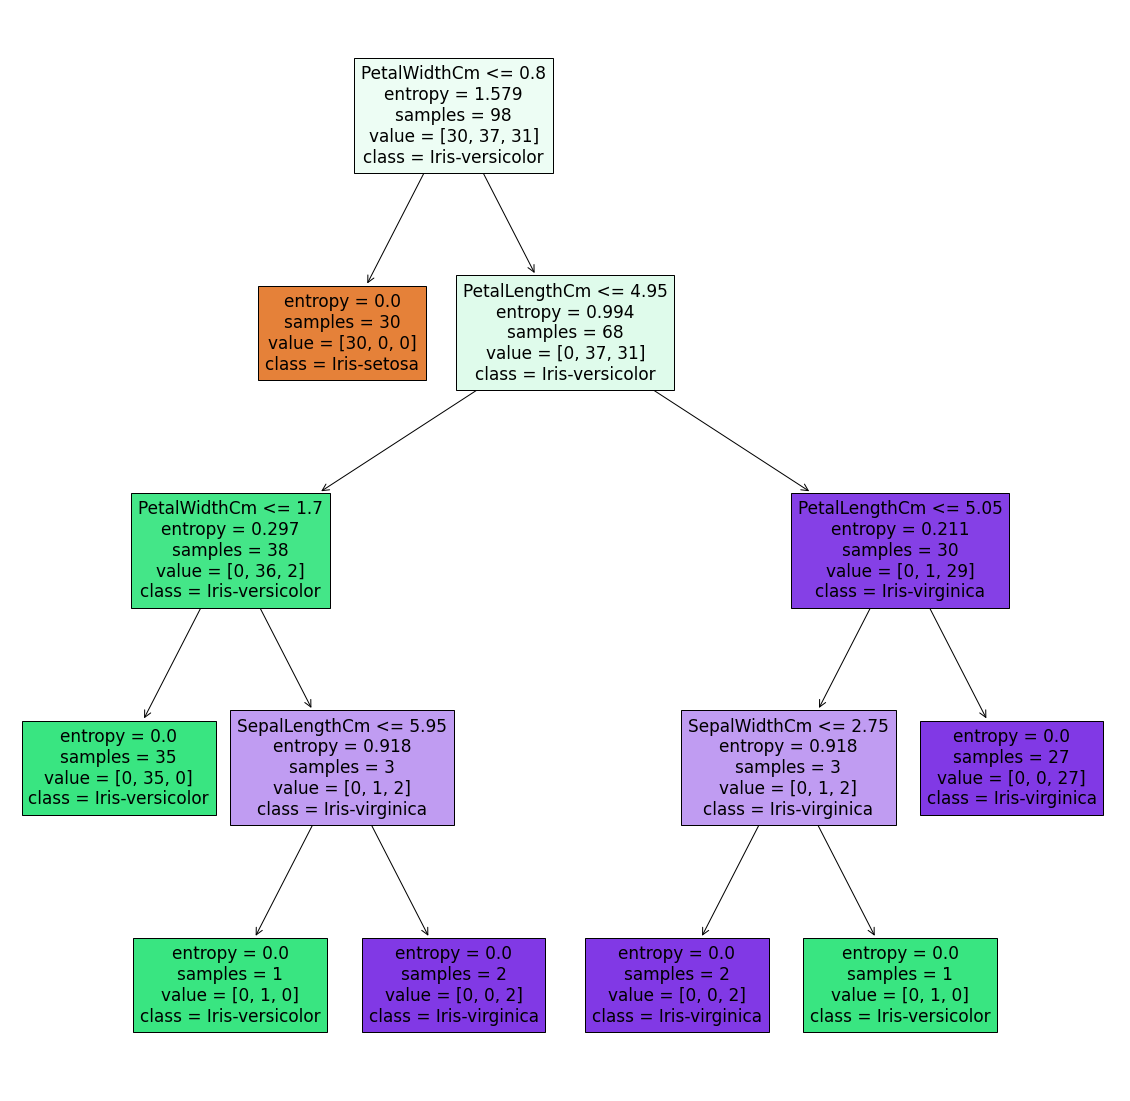

In [48]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree, feature_names=data.columns[:-1],class_names=label_names,filled=True)

## Model Evaluation

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Accuracy is 0.9387755102040817

Classification report is-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        49
      macro avg       0.93      0.94      0.93        49
   weighted avg       0.94      0.94      0.94        49



<AxesSubplot:>

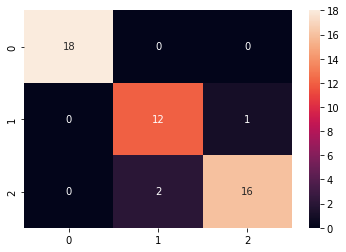

In [50]:
y_pred=decision_tree.predict(x_test)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Accuracy is",score)
print("\nClassification report is-")
print(cr)
sns.heatmap(cm,annot=True)